In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bootstrap aggregating
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100, bootstrap=True,
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)

# Single decision tree
single_tree_clf = DecisionTreeClassifier()
single_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_prediction(classifier, axes, n_samples=100):
    x0 = np.linspace(axes[0], axes[1], n_samples)
    x1 = np.linspace(axes[2], axes[3], n_samples)
    xx0, xx1 = np.meshgrid(x0, x1)
    X_new = np.c_[xx0.ravel(), xx1.ravel()]
    y_pred = classifier.predict(X_new).reshape(xx0.shape)
    cmap_green_yellow = ListedColormap(['#98fb98','#fada5e'])
    plt.contourf(xx0, xx1, y_pred, cmap=cmap_green_yellow, alpha=0.5)

def plot_dataset(X, y):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'r^')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

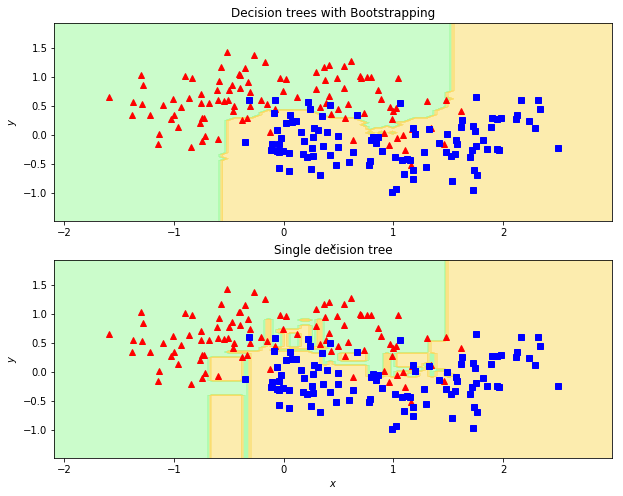

In [4]:
axes = [X_test[:,0].min()-0.5, X_test[:,0].max()+0.5,
        X_test[:,1].min()-0.5, X_test[:,1].max()+0.5]

plt.figure(figsize=(10,8))

plt.subplot(211)
plt.title('Decision trees with Bootstrapping')
plot_prediction(bag_clf, axes)
plot_dataset(X_test, y_test)

plt.subplot(212)
plt.title('Single decision tree')
plot_prediction(single_tree_clf, axes)
plot_dataset(X_test, y_test)

In [5]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
print('Accuracy of Bagging classifier:', accuracy_score(y_test, y_pred))

y_pred = single_tree_clf.predict(X_test)
print('Accuracy of Single decision tree classifier:', accuracy_score(y_test, y_pred))

Accuracy of Bagging classifier: 0.89
Accuracy of Single decision tree classifier: 0.85
